In [1]:
import numpy as np
from datetime import datetime
from astropy.table import Table

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.core.interactiveshell import InteractiveShell

In [3]:
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 500
plt.rc('font', family='serif')

In [4]:
path_log = '/large_data/factory/log'

In [10]:
start_time = 2.725*1e6

- Unit,Timestamp,GPU Index,GPU Name,Memory Total,Memory Used,GPU Utilization,Temperature

In [11]:
intbl = Table.read(f"{path_log}/gpu.log", format='csv')
intbl['n_time'] = [float(datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S').timestamp()) for timestamp_str in intbl['Timestamp']]
intbl['n_time'] -= np.min(intbl['n_time'])

intbl = intbl[intbl['n_time'] > start_time]
intbl[:5]

Unit,Timestamp,GPU Index,GPU Name,Memory Total,Memory Used,GPU Utilization,Temperature,n_time
int64,str19,int64,str21,int64,int64,int64,int64,float64
0,2024-10-22 15:45:45,0,NVIDIA A100 80GB PCIe,81920,17,0,32,2735379.0
1,2024-10-22 15:45:45,1,NVIDIA A100 80GB PCIe,81920,17,0,33,2735379.0
0,2024-10-22 15:45:46,0,NVIDIA A100 80GB PCIe,81920,17,0,32,2735380.0
1,2024-10-22 15:45:46,1,NVIDIA A100 80GB PCIe,81920,17,0,32,2735380.0
0,2024-10-22 15:45:46,0,NVIDIA A100 80GB PCIe,81920,17,0,32,2735380.0


In [12]:
u0tbl = intbl[intbl['Unit']==0]
u1tbl = intbl[intbl['Unit']==1]

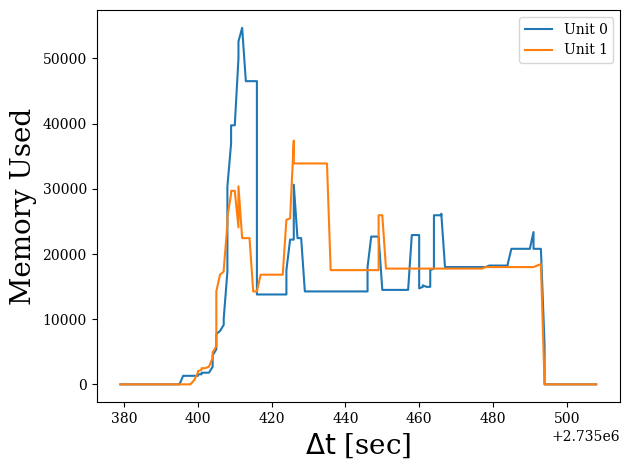

In [13]:
ykey = 'Memory Used'

plt.plot(u0tbl['n_time'], u0tbl[ykey], label='Unit 0')
plt.plot(u1tbl['n_time'], u1tbl[ykey], label='Unit 1')

plt.xlabel(r"$\rm \Delta t$ [sec]")
plt.ylabel(ykey)
plt.legend(loc='upper right')
plt.tight_layout()

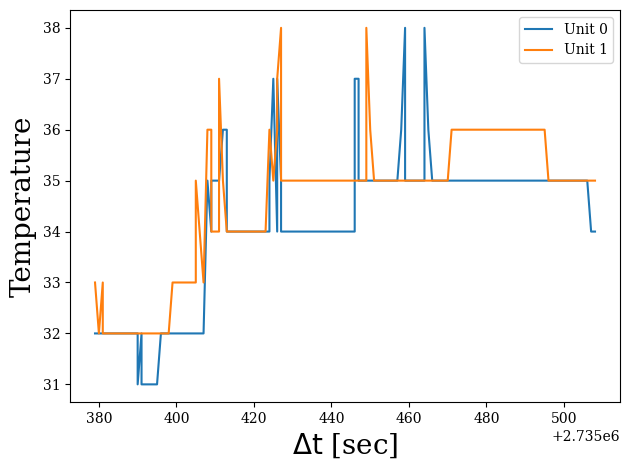

In [14]:
ykey = 'Temperature'

plt.plot(u0tbl['n_time'], u0tbl[ykey], label='Unit 0')
plt.plot(u1tbl['n_time'], u1tbl[ykey], label='Unit 1')

plt.xlabel(r"$\rm \Delta t$ [sec]")
plt.ylabel(ykey)
plt.legend(loc='upper right')
plt.tight_layout()